In [4]:
import pandas as pd

df = pd.read_csv('top5-players24-25.csv', encoding='utf-8')
print(df)

        Rk             Player   Nation    Pos        Squad  \
0        1         Max Aarons  eng ENG     DF  Bournemouth   
1        2         Max Aarons  eng ENG  DF,MF     Valencia   
2        3     Rodrigo Abajas   es ESP     DF     Valencia   
3        4     James Abankwah   ie IRL  DF,MF      Udinese   
4        5  Keyliane Abdallah   fr FRA     FW    Marseille   
...    ...                ...      ...    ...          ...   
2849  2850       Edhy Zuliani   fr FRA     DF     Toulouse   
2850  2851   Szymon Żurkowski   pl POL     MF       Empoli   
2851  2852    Martin Ødegaard   no NOR     MF      Arsenal   
2852  2853        Milan Đurić   ba BIH     FW        Monza   
2853  2854        Milan Đurić   ba BIH     FW        Parma   

                    Comp   Age    Born  MP  Starts  ...  Gls_90  Ast_90  \
0     eng Premier League  24.0  2000.0   3       1  ...    0.00    0.00   
1             es La Liga  24.0  2000.0   4       1  ...    0.00    0.00   
2             es La Liga  21.0

Rk             0
Player         0
Nation         7
Pos            0
Squad          0
Comp           0
Age            8
Born           8
MP             0
Starts         0
Min            0
90s            0
Gls            0
Ast            0
G+A            0
G-PK           0
PK             0
PKatt          0
CrdY           0
CrdR           0
xG             0
npxG           0
xAG            0
npxG+xAG       0
PrgC           0
PrgP           0
PrgR           0
Gls_90         0
Ast_90         0
G+A_90         0
G-PK_90        0
G+A-PK_90      0
xG_90          0
xAG_90         0
xG+xAG_90      0
npxG_90        0
npxG+xAG_90    0
dtype: int64
                Rk          Age         Born           MP       Starts  \
count  2854.000000  2846.000000  2846.000000  2854.000000  2854.000000   
mean   1427.500000    25.018974  1998.637034    19.024177    13.505256   
std     824.023159     4.491624     4.497922    11.510177    11.331036   
min       1.000000    15.000000  1982.000000     1.000000     

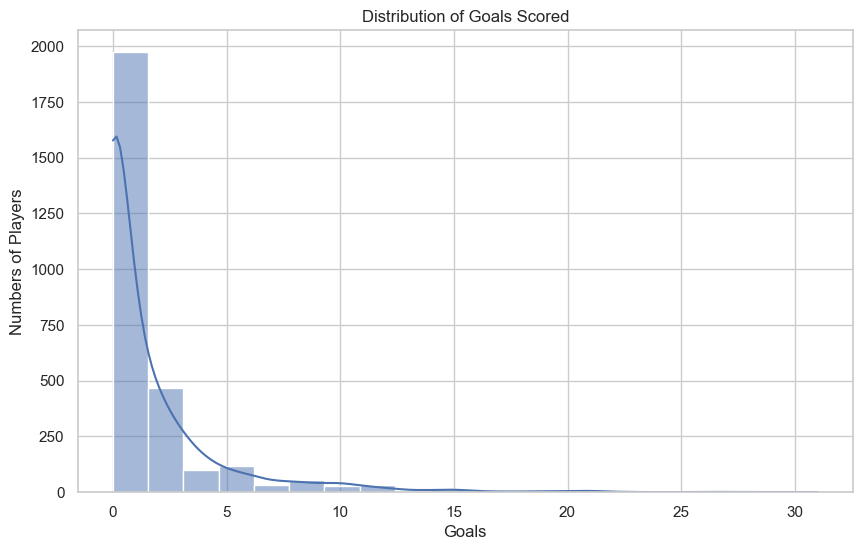

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

df.colums = [col.strip() for col in df.columns]

missing = df.isnull().sum()
print (missing)

numeric_cols = ['Age', 'Born', 'MP','Starts','Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK','PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
               'xAG', 'npxG+xAG', 'PrgC', 'PrgR', 'Gls_90', 'Ast_90', 'G+A_90','G-PK_90', 'G+A-PK_90', 'xG_90', 'xAG_90', 'xG+xAG_90',
               'npxG_90', 'npxG+xAG_90']
for col in numeric_cols:
    df[col]=pd.to_numeric(df[col], errors='coerce')
    
    
print(df.describe())

plt.figure(figsize=(10,6))
sns.histplot(df['Gls'], bins=20, kde=True)
plt.title('Distribution of Goals Scored')
plt.xlabel('Goals')
plt.ylabel('Numbers of Players')

plt.savefig('Distribution_of_Goals_Scored.png', dpi=300, bbox_inches='tight')
plt.savefig('Distribution_of_Goals_Scored.pdf', dpi=300, bbox_inches='tight')

plt.show()

In [17]:
sorted_by_goals_top10=df.sort_values('Gls', ascending=False).head(10)

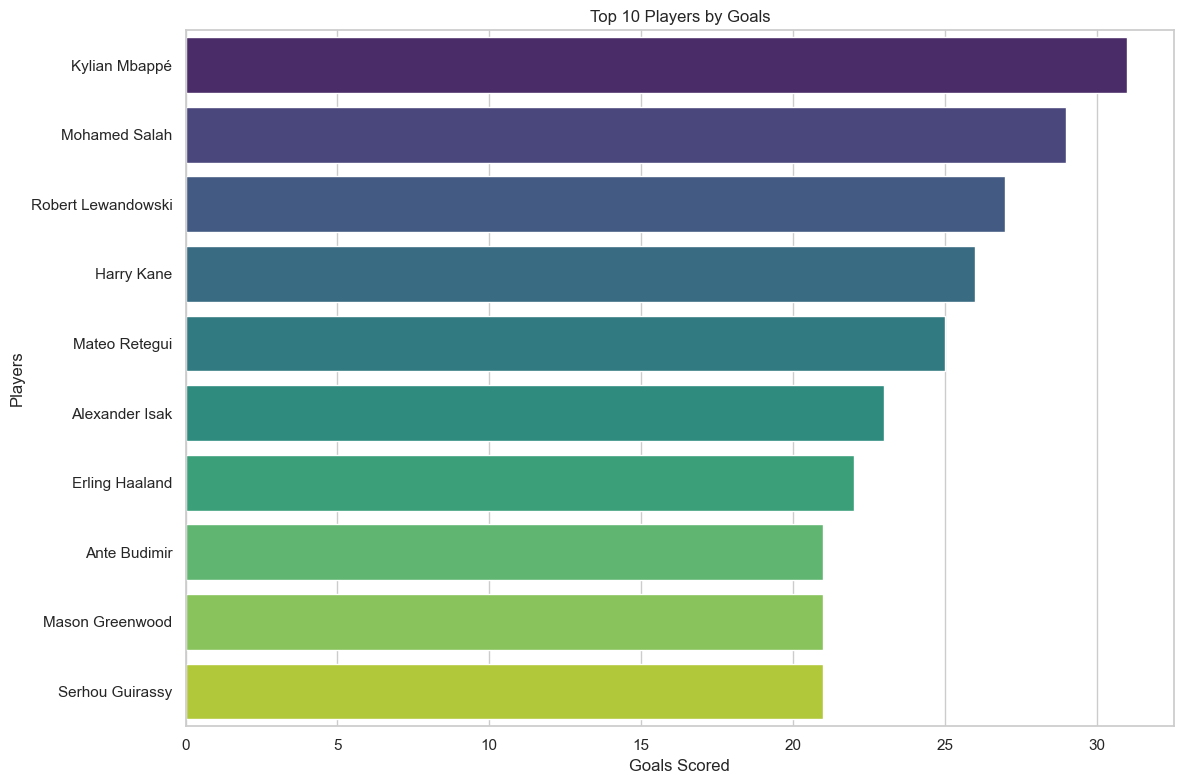

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(12,8))
sns.barplot(data=sorted_by_goals_top10, x='Gls', y='Player',  palette='viridis')
plt.title('Top 10 Players by Goals')
plt.xlabel('Goals Scored')
plt.ylabel('Players')
plt.tight_layout()

plt.savefig('top_10_goals_2024_25.png', dpi=300, bbox_inches='tight')
plt.savefig('top_10_goals_2024_25.pdf', dpi=300, bbox_inches='tight')

plt.show()

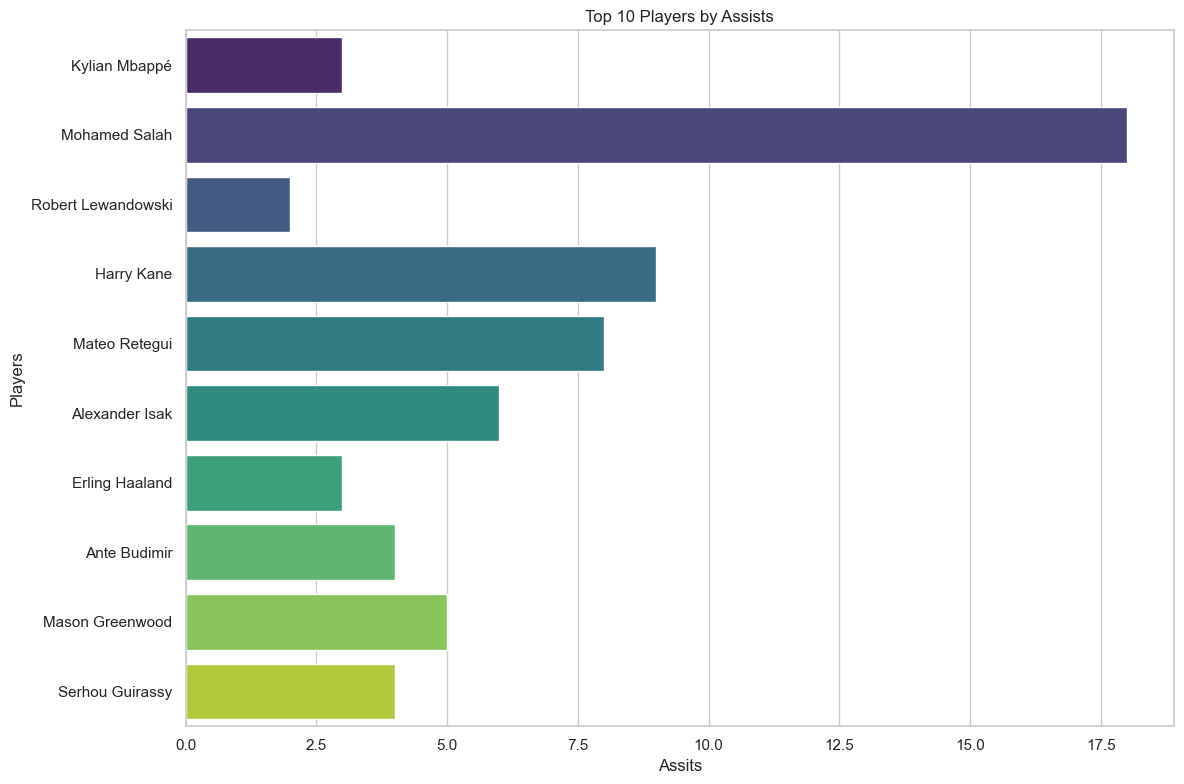

In [26]:
sns.set_style('whitegrid')

plt.figure(figsize=(12,8))
sns.barplot(data=sorted_by_goals_top10, x='Ast', y='Player',  palette='viridis')
plt.title('Top 10 Players by Assists')
plt.xlabel('Assits')
plt.ylabel('Players')
plt.tight_layout()

plt.savefig('top_10_Assists_2024_25.png', dpi=300, bbox_inches='tight')
plt.savefig('top_10_Assits_2024_25.pdf', dpi=300, bbox_inches='tight')

plt.show()

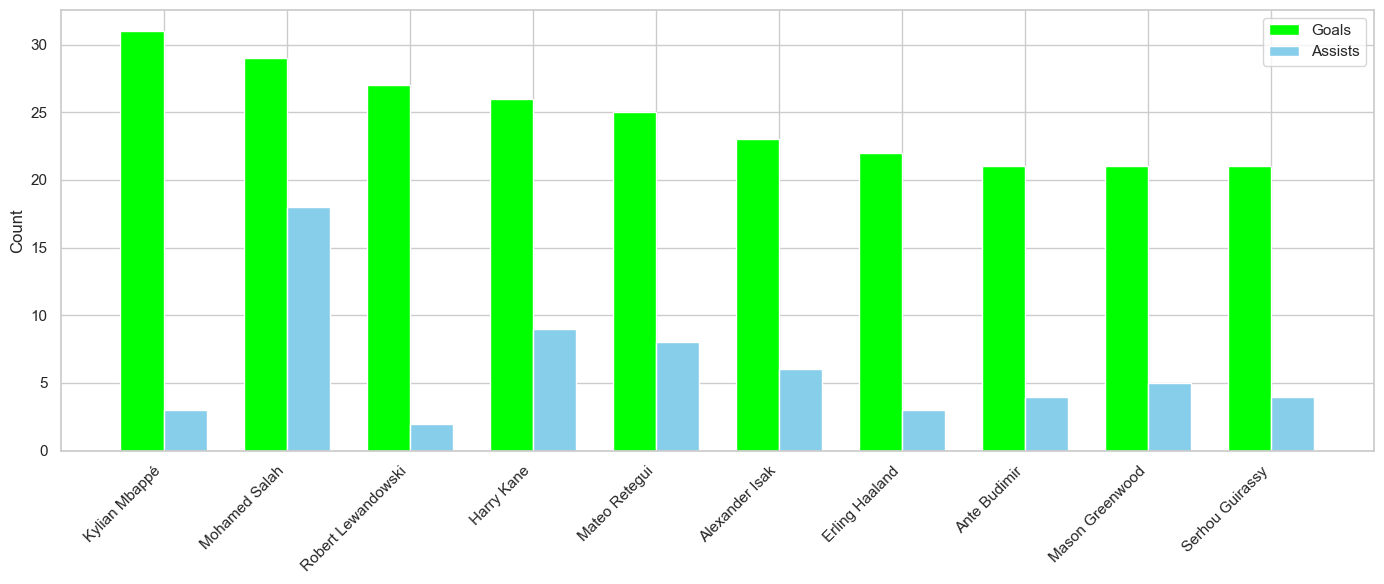

               Player  Gls  Ast
0       Kylian Mbappé   31    3
1       Mohamed Salah   29   18
2  Robert Lewandowski   27    2
3          Harry Kane   26    9
4       Mateo Retegui   25    8
5      Alexander Isak   23    6
6      Erling Haaland   22    3
7        Ante Budimir   21    4
8     Mason Greenwood   21    5
9     Serhou Guirassy   21    4


In [36]:
import numpy as np

players = sorted_by_goals_top10['Player']
goals = sorted_by_goals_top10['Gls']
assits = sorted_by_goals_top10['Ast']

x=np.arange(len(players))
width=0.35

plt.figure(figsize=(14,6))
plt.bar(x - width/2, goals, width, label='Goals', color='Lime')
plt.bar(x + width/2, assits, width, label='Assists', color='skyblue')
plt.ylabel('Count')
plt.xticks(x, players, rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.savefig('goals_vs_assits.png', dpi=300, bbox_inches='tight')
plt.savefig('Goals_vs_Assits.pdf', dpi=300, bbox_inches='tight')

plt.show()

print(sorted_by_goals_top10[['Player', 'Gls', 'Ast']].reset_index(drop=True))